# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here
#see all the unique classes
print(df_titanic['class'].unique())

#filter to include only passengers (1st, 2nd and 3rd classes)
passenger_only = df_titanic[(df_titanic['class'] == '1st') | (df_titanic['class'] == '2nd') | (df_titanic['class'] == '3rd')]
print(passenger_only['class'].unique())

#joint distribution
pd.crosstab(passenger_only['class'], passenger_only['embarked'])

['3rd' '2nd' '1st' 'engineering crew' 'victualling crew'
 'restaurant staff' 'deck crew']
['3rd' '2nd' '1st']


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [4]:
# Code here
# the conditional distribution of where they embarked given their class
cond_where_given_class = pd.crosstab(passenger_only['class'], passenger_only['embarked'], normalize='index')
# the conditional distribution of their class given where they embarked
cond_class_given_where = pd.crosstab(passenger_only['class'], passenger_only['embarked'], normalize='columns')

print(cond_where_given_class); print(cond_class_given_where)


# Proportion of 3rd class passagenrs that embarked at Southampton is .697
# Proportion of Southampton passengers who were in 3rd class is .54

embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

   class embarked     value
0    1st        B  0.333333
1    2nd        B  0.666667
2    3rd        B  0.000000
3    1st        C  0.527675
4    2nd        C  0.095941
5    3rd        C  0.376384
6    1st        Q  0.024390
7    2nd        Q  0.056911
8    3rd        Q  0.918699
9    1st        S  0.191466
10   2nd        S  0.268053
11   3rd        S  0.540481


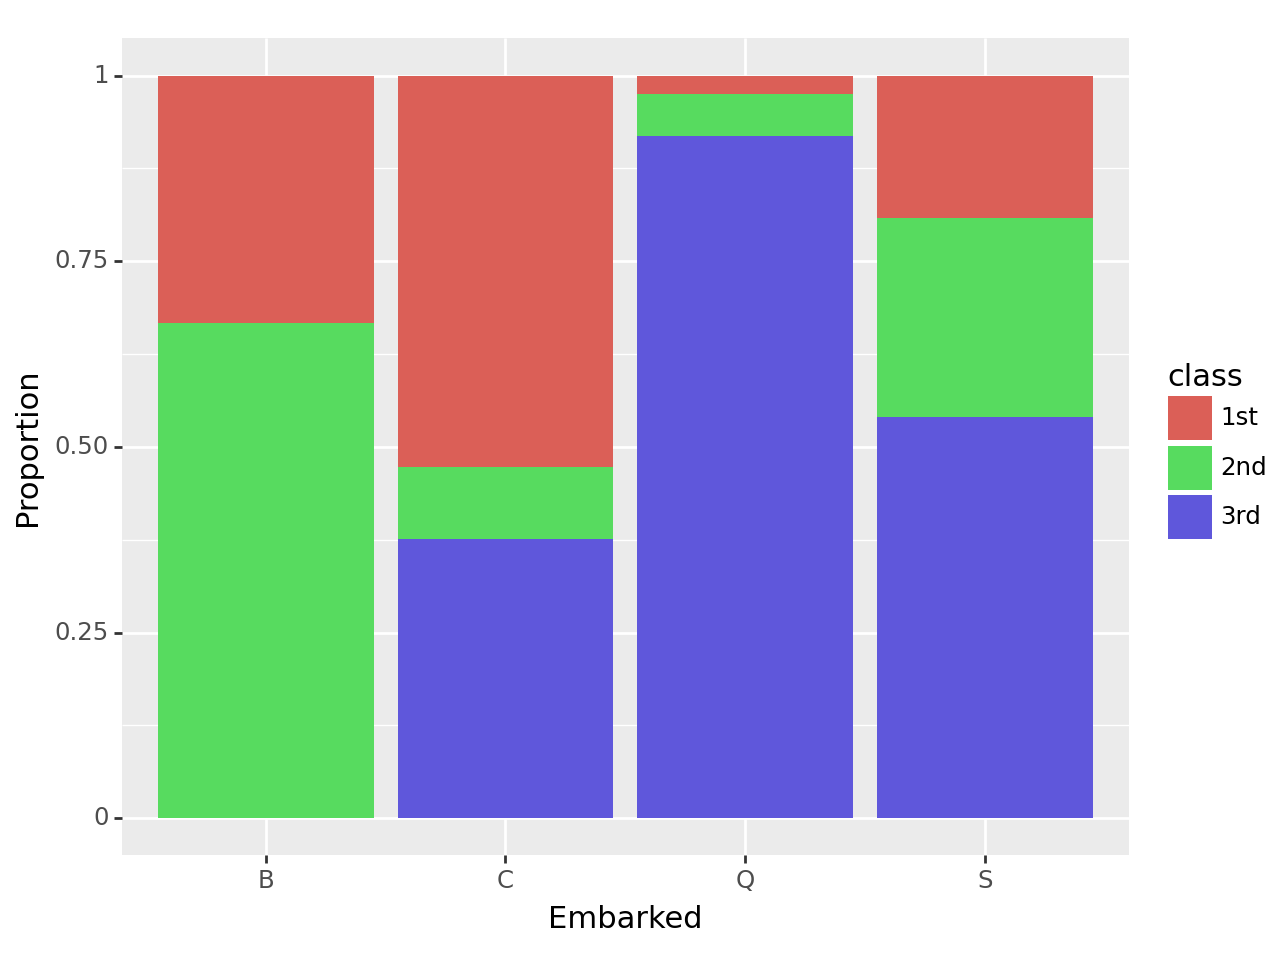

<Figure Size: (640 x 480)>

In [5]:
from plotnine import ggplot, geom_bar, aes,ylab, xlab
cond_class_given_where2 = cond_class_given_where.reset_index().melt(id_vars='class')
print(cond_class_given_where2)


plot = (ggplot(cond_class_given_where2, aes(x='embarked', y='value', fill='class'))
          + geom_bar(stat = 'identity', position= 'stack')
          + ylab('Proportion')
          + xlab ('Embarked')

)


plot